In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import OneClassSVM
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
clean_data = pd.read_csv('new_df_withoutmissing.csv')
clean_data

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,0,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,1,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,2,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,3,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,4,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...
230190,230190,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230191,230191,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230192,230192,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230193,230193,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [3]:
clean_data.isnull().sum()

Unnamed: 0                     0
Account No                     0
Balance                        0
Amount                         0
Third Party Account No    223360
Third Party Name            6835
DateTime                       0
dtype: int64

In [4]:
clean_data = clean_data.drop(['Unnamed: 0', 'Third Party Account No'], axis=1)

In [5]:
data = clean_data.dropna()
data

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [6]:
df = pd.DataFrame(data)

zero_amount_df = df[df['Amount'] == 0]

zero_amount_df

,Account No,Balance,Amount,Third Party Name,DateTime
124098,950234174.0,776.302067,-0.0,Selfridges,2023-07-11 08:21:00
132563,738958551.0,5564.249325,-0.0,Amazon,2023-07-29 18:32:00
134276,730002588.0,12939.954627,-0.0,Fat Face,2023-07-31 17:42:00
146717,581655972.0,34362.247639,-0.0,Fitted Stitch,2023-08-15 05:45:00
168830,322221939.0,3186.856806,-0.0,Revella,2023-09-16 08:04:00
192978,912705941.0,17527.347189,-0.0,Tesco,2023-10-21 05:41:00
197832,520447032.0,7416.909870,-0.0,Lloyds Pharmacy,2023-10-30 09:22:00
213034,824916823.0,8591.033140,-0.0,Sainsbury Local,2023-11-16 05:47:00
219994,687135796.0,28698.757249,-0.0,Sainsbury,2023-11-29 07:29:00


In [7]:
df

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [8]:
data['Third Party Name'].unique()

array(['Westport Care Home', 'Barbiee Boutique', 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Frankie

In [9]:
holiday_data = {
    'date': ['2025-01-01', '2025-04-18', '2025-12-25', '2025-12-26', '2025-04-18', '2025-04-21', '2025-05-05', '2025-05-26', '2025-08-25'],
    'holiday': ['New Year\'s Day', 'Good Friday', 'Christmas Day', 'Boxing Day', 'Good Friday', 'Easter Monday', 'Early May bank holiday', 'Spring bank holiday', 'Summer bank holiday']
}
df_holidays = pd.DataFrame(holiday_data)
df_holidays

,date,holiday
0,2025-01-01,New Year's Day
1,2025-04-18,Good Friday
2,2025-12-25,Christmas Day
3,2025-12-26,Boxing Day
4,2025-04-18,Good Friday
5,2025-04-21,Easter Monday
6,2025-05-05,Early May bank holiday
7,2025-05-26,Spring bank holiday
8,2025-08-25,Summer bank holiday


In [10]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays['month_day'] = df_holidays['date'].dt.strftime('%m-%d')

data['DateTime'] = pd.to_datetime(data['DateTime'])
data['month_day'] = data['DateTime'].dt.strftime('%m-%d')

df_holidays = df_holidays.drop_duplicates(subset=['month_day'])

data['Holiday'] = data['month_day'].map(df_holidays.set_index('month_day')['holiday'])

data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_67908/480043795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_67908/480043795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_day'] = data['DateTime'].dt.strftime('%m-%d')
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_67908/480043795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,NaN
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,NaN
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,NaN
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,NaN


In [11]:
data.fillna(False)

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [12]:
def check_holiday(holiday):
    if isinstance(holiday, str):
        return True
    else:
        return False

# appply the function to the 'Holiday' column
data['Holiday'] = data['Holiday'].apply(check_holiday)

data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_67908/3041737322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'] = data['Holiday'].apply(check_holiday)


,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [13]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


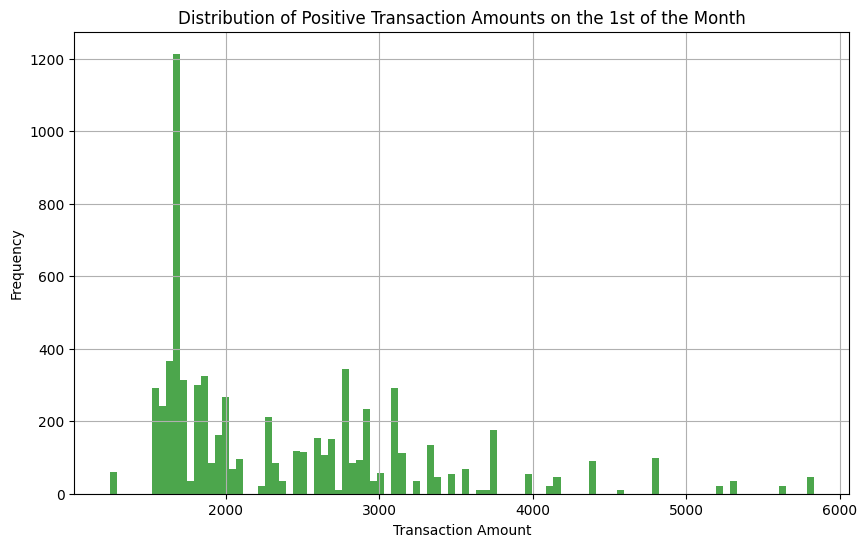

2300.0

In [14]:
# filter to consider only positive transaction amounts on the 1st as it potential to be salary
positive_transactions_on_first = data[data['Amount'] > 0]

# plot the distribution of positive transaction amounts on the 1st
plt.figure(figsize=(10, 6))
plt.hist(positive_transactions_on_first['Amount'], bins=100, color='green', alpha=0.7)
plt.title('Distribution of Positive Transaction Amounts on the 1st of the Month')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# calculate the 58th percentile of positive transaction amounts on the 1st as a potential threshold for salary identification
positive_threshold = positive_transactions_on_first['Amount'].quantile(0.58) # from graph of Don said 28,400 is med of income so i devined it into 12
positive_threshold


In [15]:
# # filer data for transactions on the 1st day that are above the threshold
# potential_salaries = data[(data['DateTime'].dt.day == 1) & (data['Amount'] > positive_threshold)]

# # group by account and month to see if these transactions occur consistently
# salary_by_account = potential_salaries.groupby('Account No').apply(lambda x: x['DateTime'].dt.month.unique())

# consistent_salary_accounts = salary_by_account[salary_by_account.apply(len) >= 3]  # cutoff of at least 3 months

# consistent_salary_accounts.head(), len(consistent_salary_accounts)


In [16]:
# salary_account_numbers = set(consistent_salary_accounts.index)
# def flag_salary(row):
#     if (row['Account No'] in salary_account_numbers) and (row['DateTime'].day == 1) and (row['Amount'] > positive_threshold):
#         return True
#     return False

# data['Is_Salary'] = data.apply(flag_salary, axis=1)

# data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].head(10), data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].tail(10)



In [17]:
# data['Is_Salary'].sum()

In [18]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [19]:
# data['DayofWeek'] = data['DateTime'].dt.weekday
# data['HourOfDay'] = data['DateTime'].dt.hour
# data['IsWeekend'] = data['DayofWeek'].isin([5, 6])

In [20]:
# data

## Subscribe Transaction

In [21]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Date'] = data['DateTime'].dt.date
data['Time'] = data['DateTime'].dt.time
data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_67908/3612069638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_67908/3612069638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['DateTime'].dt.date
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_67908/3612069638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Date,Time
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,2023-12-06,21:13:00


In [22]:
Fixed_time = ~data['Time'].isin([pd.to_datetime('00:00').time(), pd.to_datetime('23:59').time()])
data2 = data[Fixed_time]
data2 = data2[data2['Amount'] < 0]
data2

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Date,Time
4665,657139925.0,122.160000,-19.89,Deliveroo,2023-01-01 05:30:00,01-01,True,2023-01-01,05:30:00
4666,546760202.0,840.570000,-27.45,JustEat,2023-01-01 05:41:00,01-01,True,2023-01-01,05:41:00
4667,435313070.0,1318.357427,-1.65,Coop Local,2023-01-01 06:45:00,01-01,True,2023-01-01,06:45:00
4668,804317849.0,1457.668654,-55.37,Selfridges,2023-01-01 07:03:00,01-01,True,2023-01-01,07:03:00
4669,486495235.0,916.023058,-22.02,Sainsbury,2023-01-01 07:46:00,01-01,True,2023-01-01,07:46:00
...,...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,2023-12-06,21:13:00


## Transfer from loan

In [23]:
data = data[(data['Third Party Name'] != 'Halifax')]
data = data[data['Third Party Name'] != 'LBG']
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Date,Time
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,2023-12-06,21:13:00


In [24]:
# drop the original 'DateTime' column
data = data.drop(['DateTime'], axis=1)

X = data.drop(['Account No'], axis=1)
X



,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time
0,2971.000000,1584.00,Westport Care Home,01-01,True,2023-01-01,00:00:00
1,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00
4,3226.000000,1825.00,Fat Face,01-01,True,2023-01-01,00:00:00
5,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00
6,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00
...,...,...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00
230191,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00
230192,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00
230193,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00


# With flag column

In [25]:
X = data.drop(['month_day'], axis=1)
X


,Account No,Balance,Amount,Third Party Name,Holiday,Date,Time
0,678330503.0,2971.000000,1584.00,Westport Care Home,True,2023-01-01,00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,True,2023-01-01,00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,True,2023-01-01,00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,True,2023-01-01,00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,True,2023-01-01,00:00:00
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,False,2023-12-06,21:13:00


In [26]:
X = X.drop(['Account No'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday,Date,Time
0,2971.000000,1584.00,Westport Care Home,True,2023-01-01,00:00:00
1,3792.000000,1950.00,Barbiee Boutique,True,2023-01-01,00:00:00
4,3226.000000,1825.00,Fat Face,True,2023-01-01,00:00:00
5,4607.660000,2841.66,Lavender Primary,True,2023-01-01,00:00:00
6,3620.000000,1950.00,A Cut Above,True,2023-01-01,00:00:00
...,...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False,2023-12-06,20:54:00
230191,-244.837500,-62.35,Sainsbury Local,False,2023-12-06,20:55:00
230192,9709.172159,-32.94,Deliveroo,False,2023-12-06,21:05:00
230193,26834.165794,-19.25,Amazon,False,2023-12-06,21:13:00


In [27]:
X = X.drop(['Time'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday,Date
0,2971.000000,1584.00,Westport Care Home,True,2023-01-01
1,3792.000000,1950.00,Barbiee Boutique,True,2023-01-01
4,3226.000000,1825.00,Fat Face,True,2023-01-01
5,4607.660000,2841.66,Lavender Primary,True,2023-01-01
6,3620.000000,1950.00,A Cut Above,True,2023-01-01
...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False,2023-12-06
230191,-244.837500,-62.35,Sainsbury Local,False,2023-12-06
230192,9709.172159,-32.94,Deliveroo,False,2023-12-06
230193,26834.165794,-19.25,Amazon,False,2023-12-06


In [28]:
X = X.drop(['Date'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday
0,2971.000000,1584.00,Westport Care Home,True
1,3792.000000,1950.00,Barbiee Boutique,True
4,3226.000000,1825.00,Fat Face,True
5,4607.660000,2841.66,Lavender Primary,True
6,3620.000000,1950.00,A Cut Above,True
...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False
230191,-244.837500,-62.35,Sainsbury Local,False
230192,9709.172159,-32.94,Deliveroo,False
230193,26834.165794,-19.25,Amazon,False


In [29]:
# RANDOM_STATE = 10

# # Example function to handle date columns (if you have any)
# def extract_date_parts(df):
#     df['year'] = df['Date'].dt.year
#     df['month'] = df['Date'].dt.month
#     df['day'] = df['Date'].dt.day
#     return df.drop(columns=['Date'])

# # Apply this only if 'date_column' is actually in your dataset
# date_pipeline = Pipeline([
#     ('date_extractor', FunctionTransformer(extract_date_parts, validate=False))
# ])

# # Assuming 'X' is your dataframe and it contains a 'date_column'
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
#         ('scaler', StandardScaler(), ['Balance', 'Amount']),
#         ('date', date_pipeline, ['Date'])  # Include this only if a date column exists
#     ],
#     remainder='passthrough'
# )

# # Fit and transform your features
# X_preprocessed = column_transformer.fit_transform(X)

# # Split into training and validation sets
# X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)


In [30]:
RANDOM_STATE = 10
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
        ('scaler', StandardScaler(), ['Balance', 'Amount'])
    ],
    remainder='passthrough'
)


X_preprocessed = column_transformer.fit_transform(X)

X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)

In [31]:
# One-Class SVM parem
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

# find bes param
best_score = np.inf
best_params = None

for g in ParameterGrid(param_grid):
    model = OneClassSVM(**g)
    model.fit(X_train)
    scores = model.decision_function(X_val)
    score = -scores.mean()
    if score < best_score:
        best_score = score
        best_params = g

print("Best parameters:", best_params)

oc_svm_best = OneClassSVM(**best_params)


Best parameters: {'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.1}


In [34]:
oc_svm_best.fit(X_preprocessed)

anomaly_scores = oc_svm_best.decision_function(X_preprocessed)


In [ ]:
# anomaly_scores

In [35]:
anomaly_scores_df = pd.DataFrame(anomaly_scores, columns=['Anomaly Score'])

data.reset_index(drop=True, inplace=True)

# concatenate the anomaly scores with the original data
data_with_scores = pd.concat([data, anomaly_scores_df], axis=1)

print(data_with_scores.head())

    Account No  Balance   Amount    Third Party Name month_day  Holiday  \
0  678330503.0  2971.00  1584.00  Westport Care Home     01-01     True   
1  472213568.0  3792.00  1950.00    Barbiee Boutique     01-01     True   
2  624500124.0  3226.00  1825.00            Fat Face     01-01     True   
3  203466392.0  4607.66  2841.66    Lavender Primary     01-01     True   
4  768271776.0  3620.00  1950.00         A Cut Above     01-01     True   

         Date      Time  Anomaly Score  
0  2023-01-01  00:00:00     281.517256  
1  2023-01-01  00:00:00    -265.193355  
2  2023-01-01  00:00:00     101.830817  
3  2023-01-01  00:00:00   -1804.216097  
4  2023-01-01  00:00:00    -415.324984  


In [36]:
neg = data_with_scores[data_with_scores['Anomaly Score'] < 0]
neg


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00,-265.193355
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00,-1804.216097
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00,-415.324984
6,350921975.0,2458.500000,1842.50,Brilliant Brushes,01-01,True,2023-01-01,00:00:00,-933.284235
8,832564361.0,5376.000000,3542.00,Premier Finance,01-01,True,2023-01-01,00:00:00,-2311.990150
...,...,...,...,...,...,...,...,...,...
216809,279149837.0,1237.281050,-146.10,Sainsbury,12-06,False,2023-12-06,19:07:00,-192.401849
216826,858989281.0,30313.885119,-2.49,Loosely Fitted,12-06,False,2023-12-06,20:01:00,-2720.205311
216836,975345315.0,40907.910578,-73.71,Tesco,12-06,False,2023-12-06,20:40:00,-4980.792345
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-5185.239610


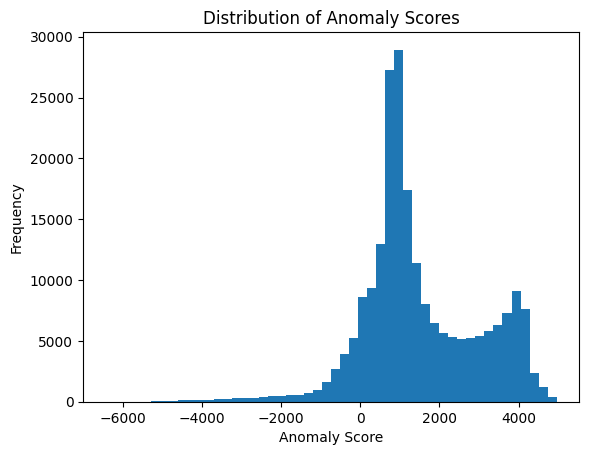

In [37]:
plt.hist(data_with_scores['Anomaly Score'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


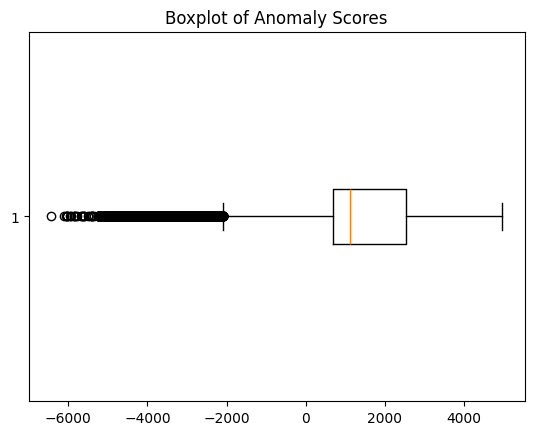

In [38]:
# Boxplot to view outliers
plt.boxplot(data_with_scores['Anomaly Score'], vert=False)
plt.title('Boxplot of Anomaly Scores')
plt.show()

In [39]:
# find threshold of anomaly scores
threshold = np.percentile(anomaly_scores, 0.17)
threshold


-4185.649670751486

In [40]:
# use threshold to identifind the anomaly behavior
data_with_scores['Is_Anomaly'] = anomaly_scores < threshold

data_with_scores


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,2023-01-01,00:00:00,281.517256,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00,-265.193355,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,2023-01-01,00:00:00,101.830817,False
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00,-1804.216097,False
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00,-415.324984,False
...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-5185.239610,True
216841,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,231.521927,False
216842,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,3595.192585,False
216843,366550080.0,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2196.153820,False


In [ ]:
# neg[neg['Account No']==581655972.0]

In [41]:
data_with_scores[(data_with_scores['Is_Anomaly'] == True) & (data_with_scores['Amount']<=0)] 

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
131162,581655972.0,35152.772609,-81.10,Tesco,08-02,False,2023-08-02,08:55:00,-4259.849713,True
132644,581655972.0,35032.350425,-57.78,Coop Local,08-05,False,2023-08-05,04:01:00,-4220.889106,True
135127,581655972.0,34586.591810,-222.60,Topshop,08-09,False,2023-08-09,18:08:00,-5059.757938,True
143119,581655972.0,33741.763043,-102.99,Sports Direct,08-26,False,2023-08-26,09:48:00,-4287.260765,True
145589,581655972.0,33518.834127,-80.32,Boots,08-31,False,2023-08-31,06:37:00,-4186.960052,True
...,...,...,...,...,...,...,...,...,...,...
216388,975345315.0,40981.620578,-15.11,Amazon,12-06,False,2023-12-06,05:27:00,-4579.750769,True
216464,558119802.0,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,2023-12-06,07:22:00,-4230.370582,True
216508,639409800.0,40441.725867,-9.20,Tesco,12-06,False,2023-12-06,08:39:00,-4310.759416,True
216836,975345315.0,40907.910578,-73.71,Tesco,12-06,False,2023-12-06,20:40:00,-4980.792345,True


In [42]:
clean_data = clean_data[['Account No', 'DateTime', 'Balance', 'Amount']]
clean_data


,Account No,DateTime,Balance,Amount
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00
2,472213568.0,2023-01-01 00:00:00,3012.000000,-780.00
3,283027736.0,2023-01-01 00:00:00,1787.000000,780.00
4,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00
...,...,...,...,...
230190,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06
230191,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35
230192,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94
230193,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25


In [43]:
data_with_scores

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,2023-01-01,00:00:00,281.517256,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00,-265.193355,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,2023-01-01,00:00:00,101.830817,False
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00,-1804.216097,False
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00,-415.324984,False
...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-5185.239610,True
216841,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,231.521927,False
216842,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,3595.192585,False
216843,366550080.0,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2196.153820,False


In [44]:
data_with_scores = pd.merge(clean_data, data_with_scores, on=['Account No', 'Balance', 'Amount'], how='inner')
data_with_scores



,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,2023-01-01,00:00:00,281.517256,False
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00,-265.193355,False
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,2023-01-01,00:00:00,101.830817,False
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00,-1804.216097,False
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00,-415.324984,False
...,...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-5185.239610,True
216841,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,231.521927,False
216842,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,3595.192585,False
216843,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2196.153820,False


In [45]:
data_with_scores['DateTime'] = pd.to_datetime(data_with_scores['DateTime'])
data_with_scores

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,2023-01-01,00:00:00,281.517256,False
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00,-265.193355,False
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,2023-01-01,00:00:00,101.830817,False
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00,-1804.216097,False
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00,-415.324984,False
...,...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-5185.239610,True
216841,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,231.521927,False
216842,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,3595.192585,False
216843,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2196.153820,False


In [46]:
data_with_scores['DayofWeek'] = data_with_scores['DateTime'].dt.weekday
data_with_scores['HourOfDay'] = data_with_scores['DateTime'].dt.hour
data_with_scores['IsWeekend'] = data_with_scores['DayofWeek'].isin([5, 6])

In [47]:
data_with_scores[data_with_scores['Is_Anomaly']==True]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
19263,822718326.0,2023-01-31 00:00:00,2743.244447,3333.00,Boots,01-31,False,2023-01-31,00:00:00,-4414.426637,True,1,0,False
19265,647472692.0,2023-01-31 00:00:00,4316.963700,4779.00,University College Hospital,01-31,False,2023-01-31,00:00:00,-4974.779648,True,1,0,False
19283,556992209.0,2023-01-31 00:00:00,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,2023-01-31,00:00:00,-4378.855046,True,1,0,False
19284,613729471.0,2023-01-31 00:00:00,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,2023-01-31,00:00:00,-4314.948498,True,1,0,False
19286,348325817.0,2023-01-31 00:00:00,4077.009809,4167.00,Matalan,01-31,False,2023-01-31,00:00:00,-4371.997553,True,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216388,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,2023-12-06,05:27:00,-4579.750769,True,2,5,False
216464,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,2023-12-06,07:22:00,-4230.370582,True,2,7,False
216508,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,2023-12-06,08:39:00,-4310.759416,True,2,8,False
216836,975345315.0,2023-12-06 20:40:00,40907.910578,-73.71,Tesco,12-06,False,2023-12-06,20:40:00,-4980.792345,True,2,20,False


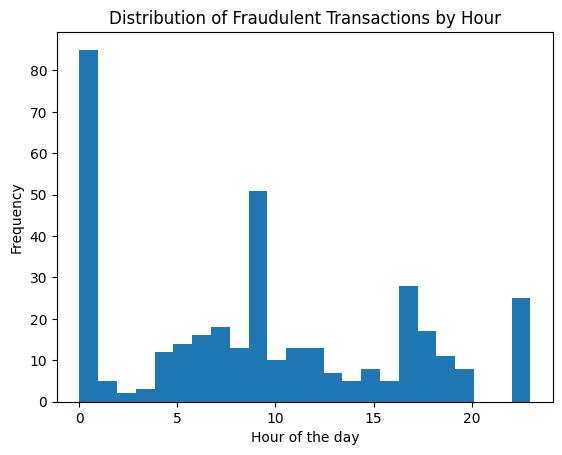

In [48]:
plt.hist(data_with_scores.loc[data_with_scores['Is_Anomaly'], 'HourOfDay'], bins=24)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()


In [49]:
flagged_df = data_with_scores[data_with_scores['Is_Anomaly']]

# find the most common values for certain columns
common_third_party_names = flagged_df['Third Party Name'].value_counts()
common_days = flagged_df['DayofWeek'].value_counts()
common_hours = flagged_df['HourOfDay'].value_counts()
common_weekend_status = flagged_df['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)



Common Third Party Names in Flagged Transactions:
 Third Party Name
Tesco                          39
Lloyds Pharmacy                26
The Works                      22
Matalan                        19
Topshop                        19
CPA                            17
Coffee #1                      17
Loosely Fitted                 16
Amazon                         15
Sports Direct                  14
Boots                          12
Selfridges                     12
University College Hospital    12
Fitted Stitch                  11
Remedy plus care               10
Coop Local                      9
Sainsbury Local                 8
Netflix                         8
Starbucks                       8
PureGym                         7
Etsy                            7
Revella                         6
Fat Face                        6
Lavender Primary                5
Jollyes                         5
Five Senses Art                 5
AMAZON                          5
Sainsbury     

In [50]:
print("\nCommon Days of Week in Flagged Transactions:\n", common_days)
print("\nCommon Hours of Day in Flagged Transactions:\n", common_hours)
print("\nIs it Commonly on Weekends?:\n", common_weekend_status)


Common Days of Week in Flagged Transactions:
 DayofWeek
1    74
6    64
3    61
5    57
4    39
2    37
0    37
Name: count, dtype: int64

Common Hours of Day in Flagged Transactions:
 HourOfDay
0     85
9     51
17    28
23    25
7     18
18    17
6     16
5     14
11    13
12    13
8     13
4     12
19    11
10    10
20     8
15     8
13     7
1      5
14     5
16     5
3      3
2      2
Name: count, dtype: int64

Is it Commonly on Weekends?:
 IsWeekend
False    248
True     121
Name: count, dtype: int64


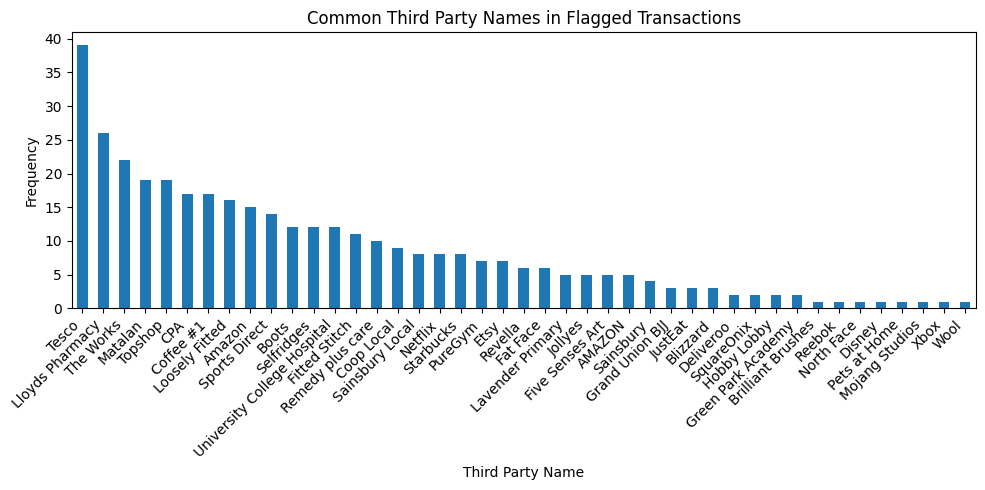

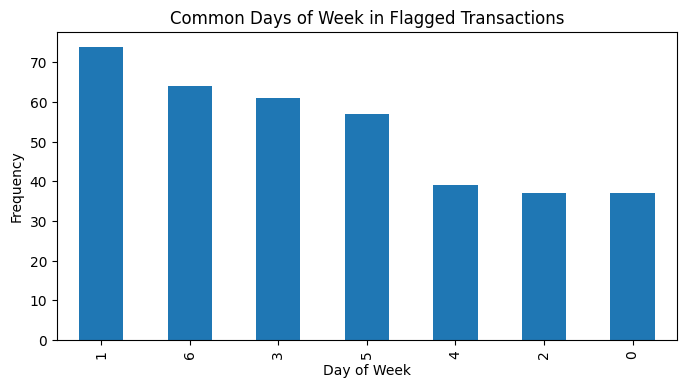

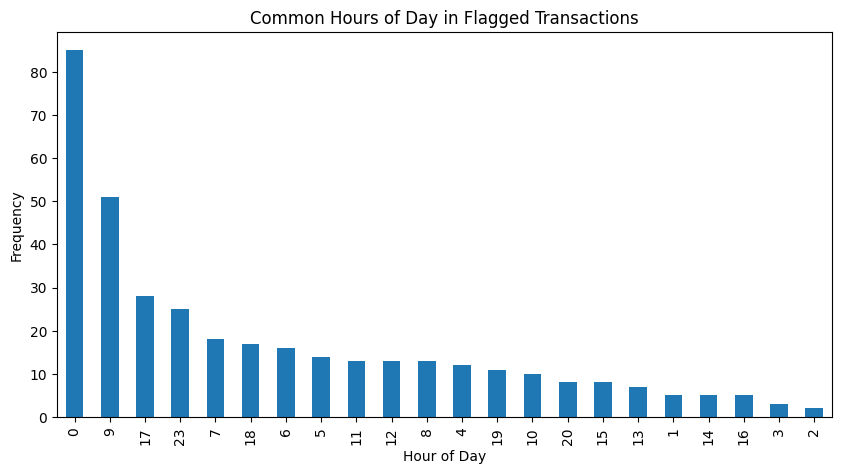

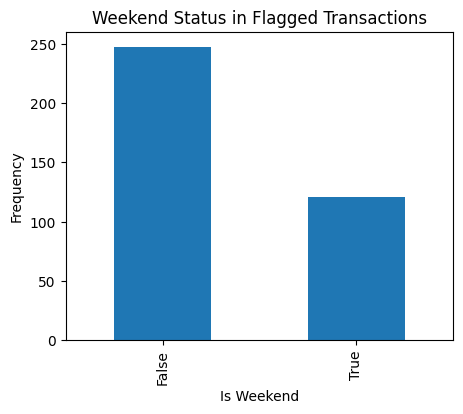

In [51]:
plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in Flagged Transactions')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Common Days of Week in Flagged Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Common Hours of Day in Flagged Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in Flagged Transactions')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()


In [52]:
data_with_scores

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00,Westport Care Home,01-01,True,2023-01-01,00:00:00,281.517256,False,6,0,True
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00,-265.193355,False,6,0,True
2,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00,Fat Face,01-01,True,2023-01-01,00:00:00,101.830817,False,6,0,True
3,203466392.0,2023-01-01 00:00:00,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00,-1804.216097,False,6,0,True
4,768271776.0,2023-01-01 00:00:00,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00,-415.324984,False,6,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216840,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-5185.239610,True,2,20,False
216841,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,231.521927,False,2,20,False
216842,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,3595.192585,False,2,21,False
216843,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2196.153820,False,2,21,False


In [53]:
anomalous_transactions = flagged_df.copy()
anomalous_transactions

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
19263,822718326.0,2023-01-31 00:00:00,2743.244447,3333.00,Boots,01-31,False,2023-01-31,00:00:00,-4414.426637,True,1,0,False
19265,647472692.0,2023-01-31 00:00:00,4316.963700,4779.00,University College Hospital,01-31,False,2023-01-31,00:00:00,-4974.779648,True,1,0,False
19283,556992209.0,2023-01-31 00:00:00,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,2023-01-31,00:00:00,-4378.855046,True,1,0,False
19284,613729471.0,2023-01-31 00:00:00,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,2023-01-31,00:00:00,-4314.948498,True,1,0,False
19286,348325817.0,2023-01-31 00:00:00,4077.009809,4167.00,Matalan,01-31,False,2023-01-31,00:00:00,-4371.997553,True,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216388,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,2023-12-06,05:27:00,-4579.750769,True,2,5,False
216464,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,2023-12-06,07:22:00,-4230.370582,True,2,7,False
216508,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,2023-12-06,08:39:00,-4310.759416,True,2,8,False
216836,975345315.0,2023-12-06 20:40:00,40907.910578,-73.71,Tesco,12-06,False,2023-12-06,20:40:00,-4980.792345,True,2,20,False


In [54]:
summary_stats = anomalous_transactions['Amount'].describe()
print(summary_stats)

count     369.000000
mean      781.110108
std      1577.220907
min      -354.900000
25%       -68.500000
50%       -22.970000
75%        -3.910000
max      5833.000000
Name: Amount, dtype: float64


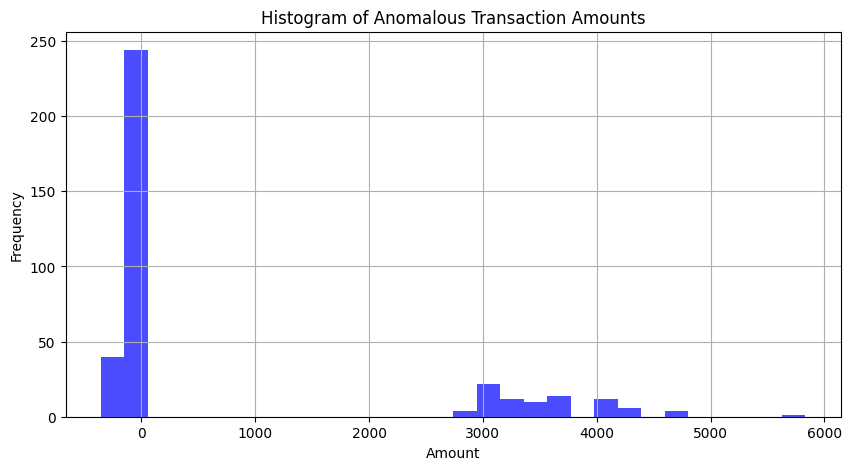

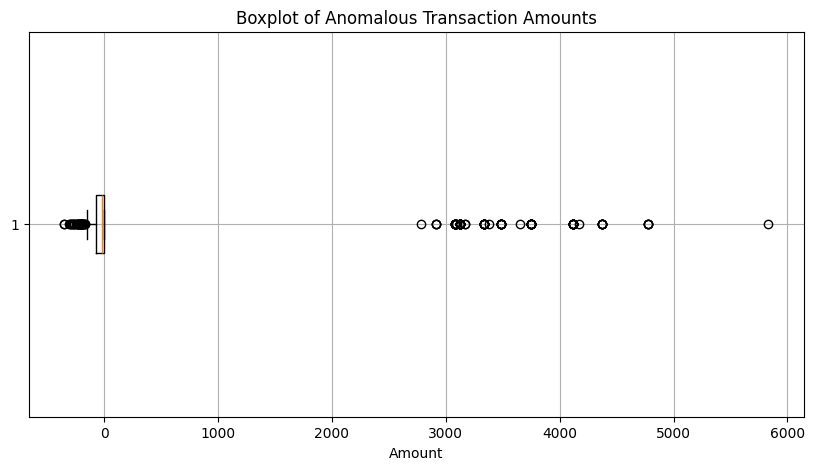

In [55]:
plt.figure(figsize=(10, 5))
plt.hist(anomalous_transactions['Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(anomalous_transactions['Amount'], vert=False)
plt.title('Boxplot of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.grid(True)
plt.show()


In [56]:
anomalous_transactions[anomalous_transactions['Account No'] == 581655972.0]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
131162,581655972.0,2023-08-02 08:55:00,35152.772609,-81.10,Tesco,08-02,False,2023-08-02,08:55:00,-4259.849713,True,2,8,False
132644,581655972.0,2023-08-05 04:01:00,35032.350425,-57.78,Coop Local,08-05,False,2023-08-05,04:01:00,-4220.889106,True,5,4,True
135127,581655972.0,2023-08-09 18:08:00,34586.591810,-222.60,Topshop,08-09,False,2023-08-09,18:08:00,-5059.757938,True,2,18,False
143119,581655972.0,2023-08-26 09:48:00,33741.763043,-102.99,Sports Direct,08-26,False,2023-08-26,09:48:00,-4287.260765,True,5,9,True
145589,581655972.0,2023-08-31 06:37:00,33518.834127,-80.32,Boots,08-31,False,2023-08-31,06:37:00,-4186.960052,True,3,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215094,581655972.0,2023-12-04 02:18:00,46010.393429,-48.11,Topshop,12-04,False,2023-12-04,02:18:00,-5252.036413,True,0,2,False
215307,581655972.0,2023-12-04 09:08:00,46003.893429,-6.50,Coffee #1,12-04,False,2023-12-04,09:08:00,-4970.097965,True,0,9,False
215902,581655972.0,2023-12-05 06:07:00,45982.164323,-21.73,Selfridges,12-05,False,2023-12-05,06:07:00,-5058.164002,True,1,6,False
215998,581655972.0,2023-12-05 09:03:00,45976.264323,-5.90,Coffee #1,12-05,False,2023-12-05,09:03:00,-4962.019095,True,1,9,False


# find threshold for large amouth


In [57]:
data

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,2023-01-01,00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,2023-01-01,00:00:00
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,2023-01-01,00:00:00
3,203466392.0,4607.660000,2841.66,Lavender Primary,01-01,True,2023-01-01,00:00:00
4,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,2023-01-01,00:00:00
...,...,...,...,...,...,...,...,...
216840,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00
216841,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00
216842,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00
216843,366550080.0,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00


In [58]:
# cal mean and standard deviation for each third party
stats = data.groupby('Third Party Name')['Amount'].agg(['mean', 'std']).reset_index()
stats['Upper_Threshold'] = stats['mean'] + 3 * stats['std']
stats['Lower_Threshold'] = stats['mean'] - 3 * stats['std']

In [59]:
stats

,Third Party Name,mean,std,Upper_Threshold,Lower_Threshold
0,A Cut Above,2013.335537,488.173800,3477.856937,548.814138
1,A Yarn Story,479.914255,896.234661,3168.618239,-2208.789729
2,AMAZON,-23.595310,19.768335,35.709696,-82.900316
3,Amazon,-16.259539,16.210770,32.372772,-64.891851
4,Barbiee Boutique,2118.988235,498.282347,3613.835277,624.141194
...,...,...,...,...,...
76,Victoria Park,1581.003077,562.166461,3267.502460,-105.496306
77,Vision Express,2125.208556,374.516311,3248.757488,1001.659624
78,Westport Care Home,1716.029412,111.359299,2050.107309,1381.951515
79,Wool,-20.171848,22.784115,48.180498,-88.524193


In [60]:
#  thresholds for unusual times and large amounts
unusual_hour_start = 0  # Midnight
unusual_hour_end = 5    # 5 AM
large_amount_threshold = 200 

anomalous_transactions = anomalous_transactions.merge(stats[['Third Party Name', 'Upper_Threshold', 'Lower_Threshold']], on='Third Party Name', how='left')

# flag transactions based on the calculated thresholds
anomalous_transactions['Unusual_Hour'] = anomalous_transactions['HourOfDay'].apply(lambda x: unusual_hour_start <= x <= unusual_hour_end)
anomalous_transactions['Large_Amount'] = anomalous_transactions.apply(lambda row: row['Amount'] > row['Upper_Threshold'] or row['Amount'] < row['Lower_Threshold'], axis=1)
anomalous_transactions['Potential_Fraud'] = anomalous_transactions.apply(lambda row: row['Is_Anomaly'] and (row['Unusual_Hour'] or row['Large_Amount']), axis=1)

# filter and display potentially fraudulent transactions
flagged_transactions = anomalous_transactions[anomalous_transactions['Potential_Fraud']]
flagged_transactions

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
0,822718326.0,2023-01-31 00:00:00,2743.244447,3333.00,Boots,01-31,False,2023-01-31,00:00:00,-4414.426637,True,1,0,False,2621.543785,-2232.439771,True,True,True
1,647472692.0,2023-01-31 00:00:00,4316.963700,4779.00,University College Hospital,01-31,False,2023-01-31,00:00:00,-4974.779648,True,1,0,False,6143.587085,1242.040034,True,False,True
2,556992209.0,2023-01-31 00:00:00,2790.587900,3333.00,Lloyds Pharmacy,01-31,False,2023-01-31,00:00:00,-4378.855046,True,1,0,False,2809.873883,-2342.993437,True,True,True
3,613729471.0,2023-01-31 00:00:00,2876.750249,3333.00,Lloyds Pharmacy,01-31,False,2023-01-31,00:00:00,-4314.948498,True,1,0,False,2809.873883,-2342.993437,True,True,True
4,348325817.0,2023-01-31 00:00:00,4077.009809,4167.00,Matalan,01-31,False,2023-01-31,00:00:00,-4371.997553,True,1,0,False,1170.873274,-1236.317739,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,639409800.0,2023-12-03 04:33:00,40553.574098,-50.38,AMAZON,12-03,False,2023-12-03,04:33:00,-4878.344906,True,6,4,True,35.709696,-82.900316,True,False,True
352,639409800.0,2023-12-04 02:13:00,40535.870529,-17.70,Fitted Stitch,12-04,False,2023-12-04,02:13:00,-4495.998826,True,0,2,False,1919.322550,-1716.767014,True,False,True
353,581655972.0,2023-12-04 02:18:00,46010.393429,-48.11,Topshop,12-04,False,2023-12-04,02:18:00,-5252.036413,True,0,2,False,116.513284,-323.859071,True,False,True
359,639409800.0,2023-12-05 05:34:00,40464.192483,-31.30,Tesco,12-05,False,2023-12-05,05:34:00,-4536.085019,True,1,5,False,351.760166,-483.820485,True,False,True


In [61]:
flagged_transactions = flagged_transactions[(flagged_transactions['Potential_Fraud']) & (flagged_transactions['Amount']<=0)]

In [62]:
flagged_transactions


,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
57,581655972.0,2023-08-05 04:01:00,35032.350425,-57.78,Coop Local,08-05,False,2023-08-05,04:01:00,-4220.889106,True,5,4,True,74.360260,-147.019501,True,False,True
73,581655972.0,2023-09-04 03:44:00,38524.244251,-34.54,Amazon,09-04,False,2023-09-04,03:44:00,-4488.893299,True,0,3,False,32.372772,-64.891851,True,False,True
80,558119802.0,2023-09-08 18:07:00,28948.758648,-354.90,Loosely Fitted,09-08,False,2023-09-08,18:07:00,-4351.565833,True,4,18,False,122.471889,-240.963713,False,True,True
82,581655972.0,2023-09-11 03:43:00,37987.024982,-70.87,Amazon,09-11,False,2023-09-11,03:43:00,-4768.868149,True,0,3,False,32.372772,-64.891851,True,True,True
83,581655972.0,2023-09-14 05:04:00,37910.150941,-25.80,Loosely Fitted,09-14,False,2023-09-14,05:04:00,-4268.493815,True,3,5,False,122.471889,-240.963713,True,False,True
88,581655972.0,2023-09-22 04:11:00,37611.724534,-36.59,Amazon,09-22,False,2023-09-22,04:11:00,-4392.548447,True,4,4,False,32.372772,-64.891851,True,False,True
93,581655972.0,2023-09-25 01:55:00,37261.610183,-65.51,Sainsbury Local,09-25,False,2023-09-25,01:55:00,-4602.845981,True,0,1,False,86.367927,-171.145398,True,False,True
120,581655972.0,2023-10-02 01:28:00,39826.968423,-42.80,Boots,10-02,False,2023-10-02,01:28:00,-4703.408815,True,0,1,False,2621.543785,-2232.439771,True,False,True
122,581655972.0,2023-10-04 05:31:00,39819.891580,-4.39,Fitted Stitch,10-04,False,2023-10-04,05:31:00,-4274.305863,True,2,5,False,1919.322550,-1716.767014,True,False,True
127,581655972.0,2023-10-07 05:02:00,39672.198903,-55.46,Selfridges,10-07,False,2023-10-07,05:02:00,-4759.665828,True,5,5,True,1819.743404,-1640.653717,True,False,True


In [63]:
flagged_transactions.shape

(44, 19)

In [64]:
# show stats of 'Third Party Name'
transaction_stats = flagged_transactions.groupby('Account No').agg({
    'Amount': ['mean', 'std', 'count', 'sum'],
    'Anomaly Score': ['mean', 'min', 'max']
}).reset_index()

transaction_stats


Account No      Amount                            Anomaly Score  \
                      mean         std count      sum          mean   
0  558119802.0 -188.562500  148.117287     4  -754.25  -4840.273453   
1  581655972.0  -46.991154   66.677832    26 -1221.77  -4720.317394   
2  639409800.0  -67.228571   94.343554     7  -470.60  -4707.607220   
3  975345315.0  -56.830000   65.779694     7  -397.81  -4710.159882   

                             
           min          max  
0 -5847.108543 -4351.565833  
1 -6431.660991 -4220.889106  
2 -5786.936386 -4254.733746  
3 -5388.874401 -4430.879422

In [65]:
flagged_transactions[flagged_transactions['Account No'] == 558119802.0]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
80,558119802.0,2023-09-08 18:07:00,28948.758648,-354.90,Loosely Fitted,09-08,False,2023-09-08,18:07:00,-4351.565833,True,4,18,False,122.471889,-240.963713,False,True,True
207,558119802.0,2023-11-04 04:51:00,35315.406254,-87.56,Etsy,11-04,False,2023-11-04,04:51:00,-4554.901821,True,5,4,True,36.394951,-83.169640,True,True,True
306,558119802.0,2023-11-30 04:52:00,39449.662831,-42.29,Selfridges,11-30,False,2023-11-30,04:52:00,-4607.517614,True,3,4,False,1819.743404,-1640.653717,True,False,True
345,558119802.0,2023-12-02 15:17:00,37931.844994,-269.50,Loosely Fitted,12-02,False,2023-12-02,15:17:00,-5847.108543,True,5,15,True,122.471889,-240.963713,False,True,True


In [66]:
clean_data[clean_data['Account No'] == 558119802.0]

,Account No,DateTime,Balance,Amount
875,558119802.0,2023-01-01 00:00:00,-282.000000,-1034.00
3793,558119802.0,2023-01-01 00:00:00,-297.990000,-15.99
3794,558119802.0,2023-01-01 00:00:00,-305.980000,-7.99
4868,558119802.0,2023-01-01 10:32:00,-376.922200,-70.94
7470,558119802.0,2023-01-04 20:37:00,-446.467900,-69.55
...,...,...,...,...
227995,558119802.0,2023-12-03 08:16:00,37865.633356,-66.21
228641,558119802.0,2023-12-04 08:53:00,37854.843690,-10.79
229097,558119802.0,2023-12-04 19:20:00,37820.713690,-34.13
229272,558119802.0,2023-12-05 06:52:00,37789.800739,-30.91


Common Third Party Names in Flagged Transactions:
 Third Party Name
Amazon             10
Loosely Fitted      5
Sainsbury Local     5
Fitted Stitch       4
Etsy                3
Revella             3
Blizzard            3
Selfridges          2
Tesco               2
Topshop             2
Coop Local          1
Boots               1
Sainsbury           1
Reebok              1
AMAZON              1
Name: count, dtype: int64


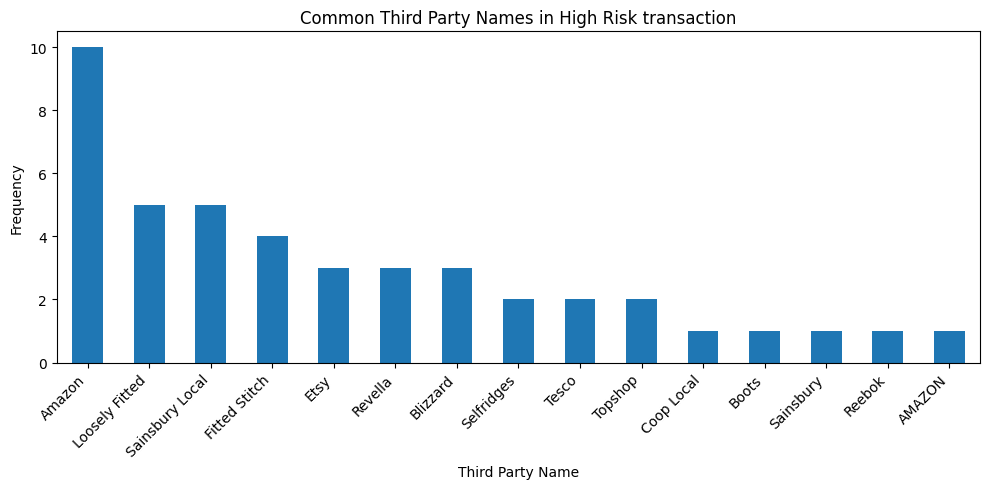

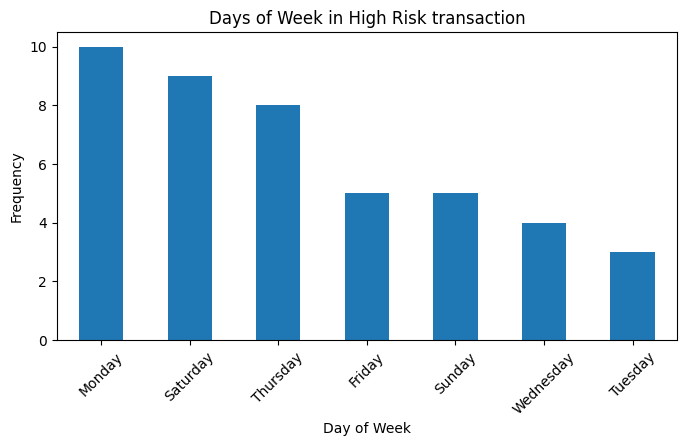

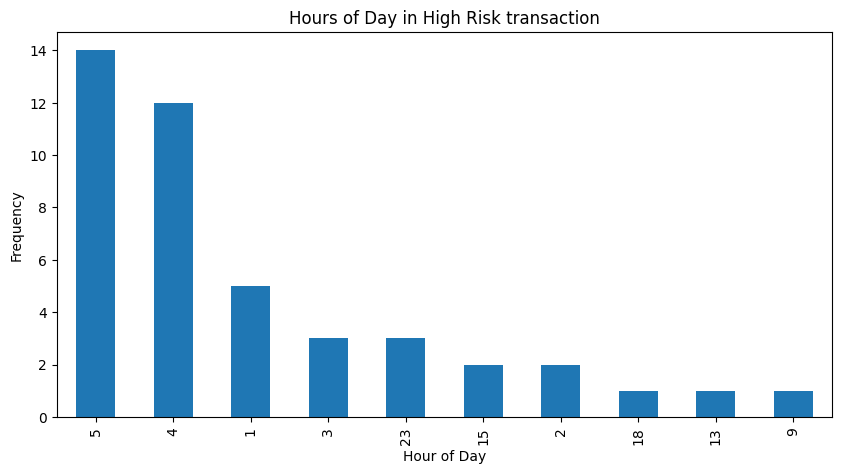

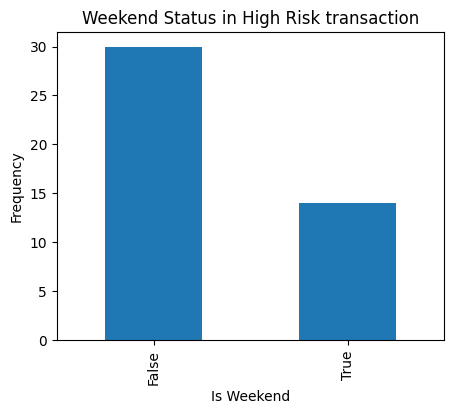

In [67]:
common_third_party_names = flagged_transactions['Third Party Name'].value_counts()
common_days = flagged_transactions['DayofWeek'].value_counts()
common_hours = flagged_transactions['HourOfDay'].value_counts()
common_weekend_status = flagged_transactions['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)


plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in High Risk transaction')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
common_days.index = common_days.index.map(day_of_week_map)


plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Days of Week in High Risk transaction')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Hours of Day in High Risk transaction')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in High Risk transaction')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()
